# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import datetime as dt
import pprint as pp

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#for c in cities:
#    print(c, end=" ")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url_base = "http://api.openweathermap.org/data/2.5/weather?q={}&appid={}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    url = url_base.format(city, weather_api_key)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    #pp.pprint(url)
    
    # Run an API request for each of the cities
    try:        
        # Parse the JSON and retrieve data
        res = requests.get(url)

        data = res.json()
        #pp.pprint(data)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data['coord']['lat']
        city_lng = data['coord']['lon']
        city_max_temp = data['main']['temp_max']
        city_humidity = data['main']['humidity']
        city_clouds = data['clouds']['all']
        city_wind = data['wind']['speed']
        city_country = data['sys']['country']
        #city_date = 
        city_date = dt.datetime.fromtimestamp(data['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        #pp.pprint(city_data[i])
    
    # If an error is experienced, skip the city
    except Exception as e:
        #print(e)
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | kidal
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | puerto baquerizo moreno
Processing Record 5 of Set 1 | bodo
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | moyynkum
Processing Record 8 of Set 1 | terenozek
Processing Record 9 of Set 1 | hinthada
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | nar'yan-mar
Processing Record 13 of Set 1 | lihue
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | severnoye
Processing Record 18 of Set 1 | margate
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | antigonish
Processing Record 21 of Set 1 | alofi
Processing Record 22 of Set 1 | puerto ayora
Processing Reco

In [4]:
# Print first city data
pp.pprint(city_data[0])

{'City': 'puerto natales',
 'Cloudiness': 100,
 'Country': 'CL',
 'Date': datetime.datetime(2024, 10, 19, 3, 30, 50),
 'Humidity': 96,
 'Lat': -51.7236,
 'Lng': -72.4875,
 'Max Temp': 280,
 'Wind Speed': 2.19}


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,280.00,96,100,2.19,CL,2024-10-19 03:30:50
1,kidal,18.4411,1.4078,309.91,11,11,2.28,ML,2024-10-19 03:30:51
2,grytviken,-54.2811,-36.5092,271.04,71,68,5.21,GS,2024-10-19 03:30:53
3,puerto baquerizo moreno,-0.9000,-89.6000,293.91,84,97,4.57,EC,2024-10-19 03:30:54
4,bodo,67.2800,14.4050,286.36,67,0,3.09,NO,2024-10-19 03:30:55


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,280.00,96,100,2.19,CL,2024-10-19 03:30:50
1,kidal,18.4411,1.4078,309.91,11,11,2.28,ML,2024-10-19 03:30:51
2,grytviken,-54.2811,-36.5092,271.04,71,68,5.21,GS,2024-10-19 03:30:53
3,puerto baquerizo moreno,-0.9000,-89.6000,293.91,84,97,4.57,EC,2024-10-19 03:30:54
4,bodo,67.2800,14.4050,286.36,67,0,3.09,NO,2024-10-19 03:30:55


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

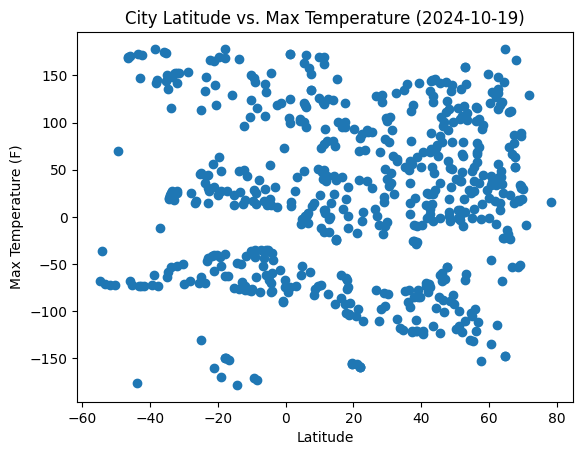

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Lng'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (" + str(city_data_df['Date'][0])[:10] + ")")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

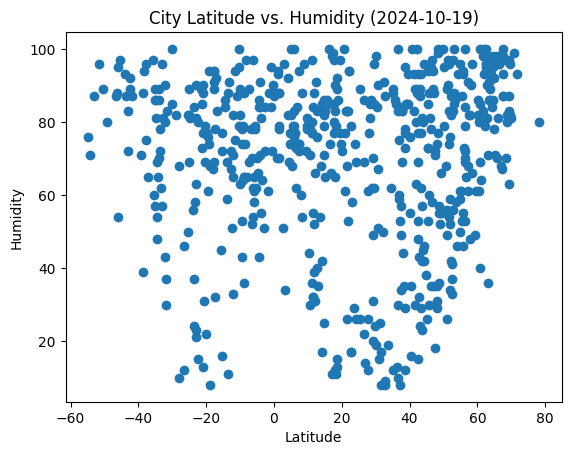

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (" + str(city_data_df['Date'][0])[:10] + ")")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

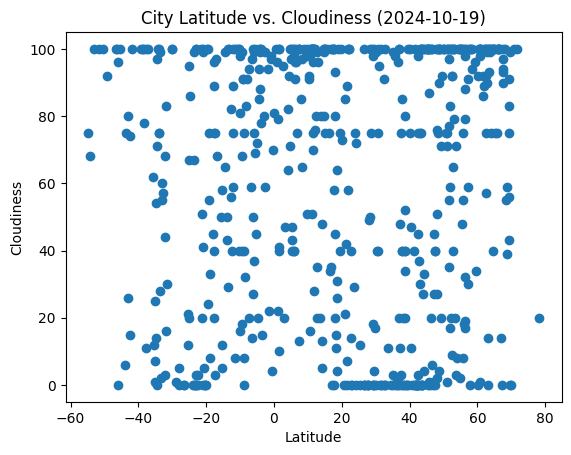

In [11]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness ("+str(city_data_df['Date'][0])[:10]+")")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

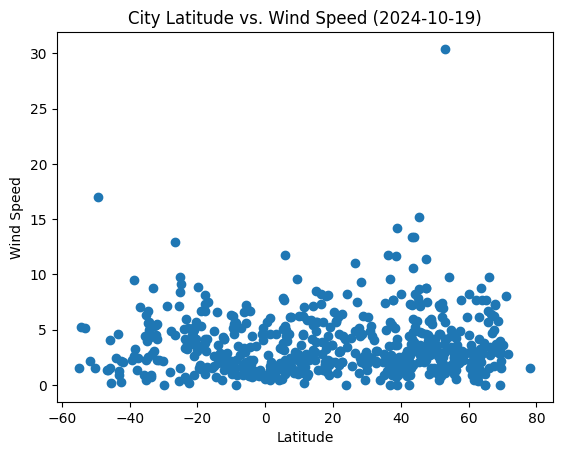

In [12]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed ("+str(city_data_df['Date'][0])[:10]+")")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def makePlot(df, against):

    slope, intercept, r, p_value, std_err = linregress(df['Lat'], df[against])
    y_pred = slope * df['Lat'] + intercept
    print(f"The r^2-value is: {r**2}")

    plt.scatter(df['Lat'], df[against], label='data')
    plt.plot(df['Lat'], y_pred, label='y={:.2f}x+{:.2f}'.format(slope,intercept), color='red')

    plt.xlabel('Latitude')
    plt.ylabel(against)
    plt.title('Latitude vs ' + against)
    plt.legend()

    plt.show()    
    return

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kidal,18.4411,1.4078,309.91,11,11,2.28,ML,2024-10-19 03:30:51
4,bodo,67.2800,14.4050,286.36,67,0,3.09,NO,2024-10-19 03:30:55
5,longyearbyen,78.2186,15.6401,273.06,80,20,1.54,SJ,2024-10-19 03:30:56
6,moyynkum,44.2914,72.9469,286.21,42,33,8.20,KZ,2024-10-19 03:30:57
7,terenozek,45.0500,64.9833,289.97,26,100,7.84,KZ,2024-10-19 03:30:58


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,280.00,96,100,2.19,CL,2024-10-19 03:30:50
2,grytviken,-54.2811,-36.5092,271.04,71,68,5.21,GS,2024-10-19 03:30:53
3,puerto baquerizo moreno,-0.9000,-89.6000,293.91,84,97,4.57,EC,2024-10-19 03:30:54
9,vila velha,-20.3297,-40.2925,299.23,79,0,4.12,BR,2024-10-19 03:31:00
14,carnarvon,-24.8667,113.6333,294.47,81,86,9.13,AU,2024-10-19 03:31:06


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6691372771160611


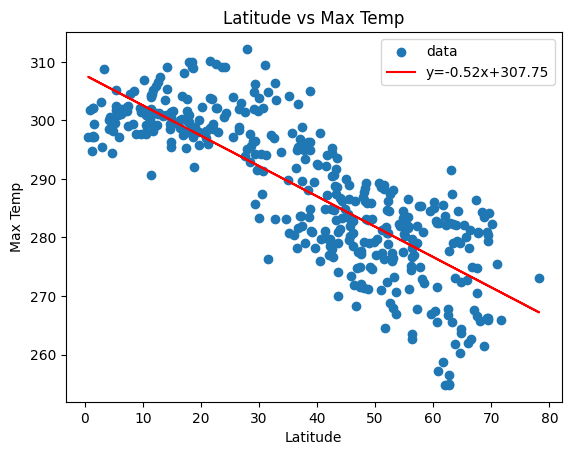

In [25]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
makePlot(northern_hemi_df, 'Max Temp')


The r^2-value is: 0.508025422745482


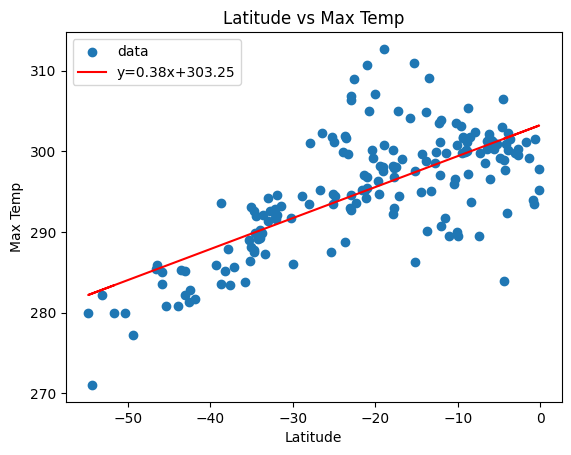

In [26]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
makePlot(southern_hemi_df, 'Max Temp')


**Discussion about the linear relationship:** Latitude and Max Temp appear to have a higher correlation coefficient for the northern hemisphere dataset. This makes sense since the datapoints for the northern set are more closely positioned near the regression line. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.018409182986768906


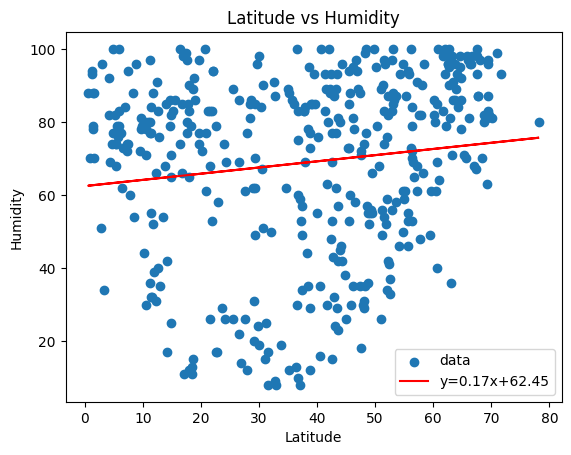

In [27]:
# Northern Hemisphere
# YOUR CODE HERE
makePlot(northern_hemi_df, 'Humidity')


The r^2-value is: 0.008282508817198306


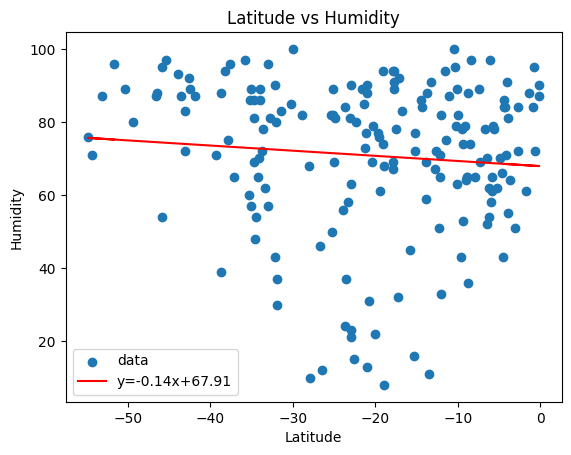

In [28]:
# Southern Hemisphere
# YOUR CODE HERE
makePlot(southern_hemi_df, 'Humidity')


**Discussion about the linear relationship:** The correlation between latitude and humidity is very low for both northern and southern hemisphere datapoints. This perhaps could be explained by there being an even distribution of humid environments within these hemispheres, or tropical climates around the equator being more humid regardless of hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0016182022475799305


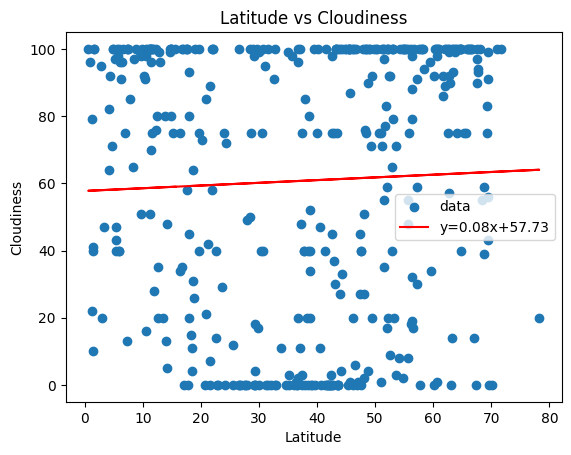

In [29]:
# Northern Hemisphere
# YOUR CODE HERE
makePlot(northern_hemi_df, 'Cloudiness')


The r^2-value is: 0.001401075339994898


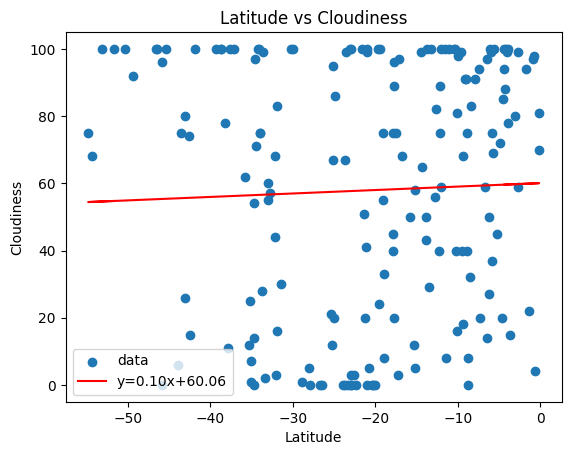

In [30]:
# Southern Hemisphere
# YOUR CODE HERE
makePlot(southern_hemi_df, 'Cloudiness')


**Discussion about the linear relationship:** Due to the very low r^2, there appears to be a low correlation between latitude and cloudiness in both the northern and southern hemisphere datasets.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0014230262657386182


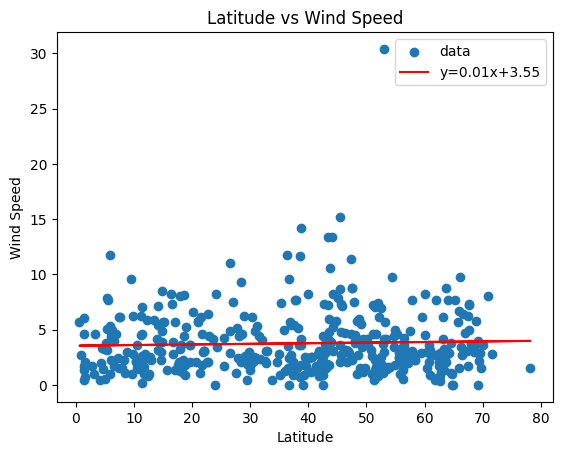

In [34]:
# Northern Hemisphere
# YOUR CODE HERE
makePlot(northern_hemi_df, 'Wind Speed')


The r^2-value is: 0.014260551053093443


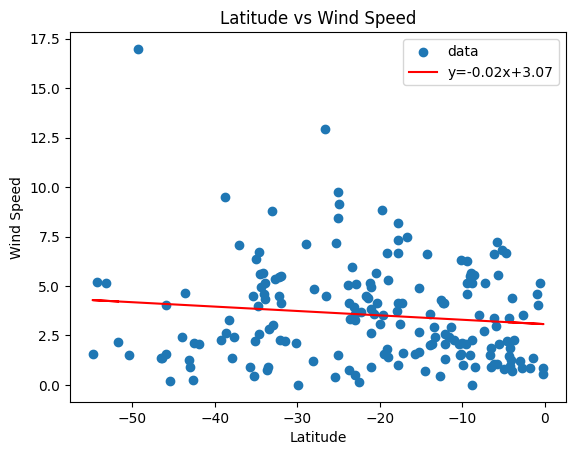

In [33]:
# Southern Hemisphere
# YOUR CODE HERE
makePlot(southern_hemi_df, 'Wind Speed')


**Discussion about the linear relationship:** Neither the northern nor the southern hemisphere datasets exhibited much correlation between latitude and windspeed. Perhaps this has to do with the complex atmospheric currents that factor into wind speed.